In [22]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams

# 设置中文字体（SimHei 是黑体）
rcParams['font.sans-serif'] = ['SimHei']  
rcParams['axes.unicode_minus'] = False    

class BernoulliBandit:
    """
    伯努利多臂老虎机
    
    参数:
        K (int): 老虎机的臂(拉杆)数量
        seed (int, optional): 随机种子，用于结果复现
    
    属性:
        probs (np.ndarray): 每个臂的奖励概率(0-1之间的值)
        best_idx (int): 最优臂的索引
        best_prob (float): 最优臂的奖励概率
        K (int): 臂的数量
        counts (np.ndarray): 每个臂被选择的次数
        values (np.ndarray): 每个臂的平均奖励值
        cumulative_regret (float): 累积遗憾
        cumulative_reward (float): 累积奖励
        history (list): 历史选择记录(臂索引, 奖励)
    """
    
    def __init__(self, K, seed=None):
        """
        初始化伯努利多臂老虎机
        
        参数:
            K (int): 臂的数量
            seed (int, optional): 随机种子
        """
        if seed is not None:
            np.random.seed(seed)
            
        self.probs = np.random.uniform(size=K)       # 随机生成K个0~1的数，作为拉动每根拉杆的获得奖励的概率
        self.best_idx = np.argmax(self.probs)        # 获奖概率最大的拉杆索引
        self.best_prob = self.probs[self.best_idx]   # 最大的奖励概率
        self.K = K
        
        # 初始化统计信息
        self.counts = np.zeros(K, dtype=int)         # 每个臂被选择的次数
        self.values = np.zeros(K)                    # 每个臂的平均奖励值
        self.cumulative_regret = 0.0                # 累积遗憾
        self.cumulative_reward = 0.0                # 累积奖励
        self.history = []                            # 历史选择记录(臂索引, 奖励)

    def step(self, k):
        """
        选择指定的臂并返回奖励
        
        参数:
            k (int): 选择的臂索引(0到K-1)
        
        返回:
            reward (int): 奖励值(0或1)
        """
        # 检查输入有效性
        if k < 0 or k >= self.K:
            raise ValueError(f"臂索引{k}超出范围(0-{self.K-1})")

        # 生成奖励(伯努利试验)
        reward = 1 if np.random.rand() < self.probs[k] else 0

        # 更新统计信息
        self.counts[k] += 1
        self.values[k] += (reward - self.values[k]) / self.counts[k]

        self.cumulative_reward += reward
        self.cumulative_regret += self.best_prob - reward

        # 记录历史
        self.history.append((k, reward))

        return reward

    def reset_stats(self):
        """重置所有统计信息(保持概率分布不变)"""
        self.counts = np.zeros(self.K, dtype=int)
        self.values = np.zeros(self.K)
        self.cumulative_regret = 0.0
        self.cumulative_reward = 0.0
        self.history = []

    def plot_probabilities(self):
        """可视化每个臂的奖励概率"""
        plt.figure(figsize=(10, 6))
        plt.bar(range(self.K), self.probs, color='skyblue')
        plt.axhline(y=self.best_prob, color='r', linestyle='--', label=f'最优概率: {self.best_prob:.4f}')
        plt.xlabel('臂索引')
        plt.ylabel('奖励概率')
        plt.title('多臂老虎机奖励概率分布')
        plt.legend()
        plt.grid(True, axis='y', alpha=0.3)
        plt.show()

    def plot_performance(self):
        """可视化老虎机的性能指标"""
        if not self.history:
            print("没有历史数据可供绘图")
            return
            
        # 准备数据
        steps = np.arange(1, len(self.history) + 1)
        rewards = np.array([r for _, r in self.history])
        cumulative_rewards = np.cumsum(rewards)
        cumulative_regrets = np.cumsum([self.best_prob - r for r in rewards])
        
        # 创建图表
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
        
        # 累积奖励图
        ax1.plot(steps, cumulative_rewards, label='累积奖励')
        ax1.plot(steps, self.best_prob * steps, 'r--', label='理论最大奖励')
        ax1.set_title('累积奖励随时间变化')
        ax1.set_ylabel('累积奖励')
        ax1.legend()
        ax1.grid(True)
        
        # 累积遗憾图
        ax2.plot(steps, cumulative_regrets, label='累积遗憾')
        ax2.set_title('累积遗憾随时间变化')
        ax2.set_xlabel('步数')
        ax2.set_ylabel('累积遗憾')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

    def __str__(self):
        """返回老虎机的字符串表示"""
        return (f"BernoulliBandit(K={self.K}, best_arm={self.best_idx}, "
                f"best_prob={self.best_prob:.4f})")

随机生成了10个伯努利老虎机
获得概率最大的拉杆为6号，其获奖概率为0.8974


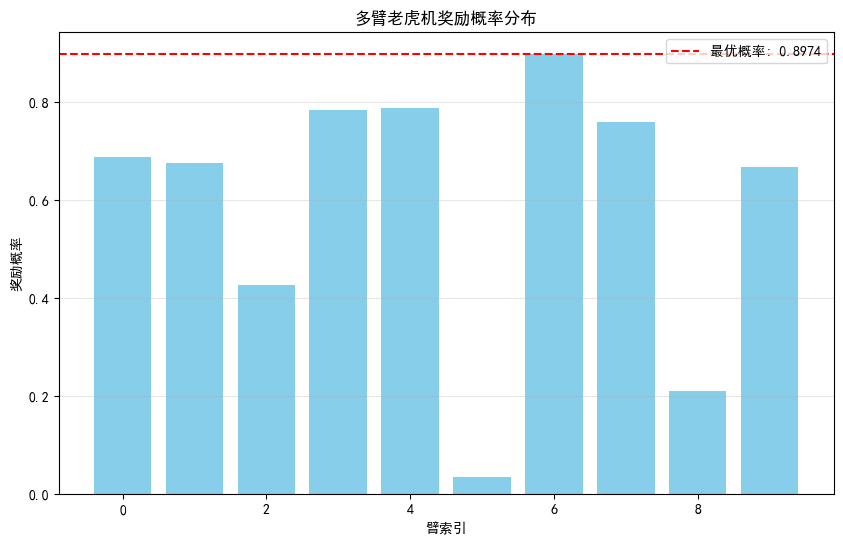

In [23]:
np.random.seed(114514)
K = 10
bandit = BernoulliBandit(K)
print (f"随机生成了{K}个伯努利老虎机")
print (f"获得概率最大的拉杆为{bandit.best_idx}号，其获奖概率为{bandit.best_prob:.4f}")
bandit.plot_probabilities()

In [54]:
# clear former information
bandit.reset_stats()

# some initializations
steps = 200
epsilon = 0.2

"""策略1： epsilon-greedy"""
def epsilon_greedy(bandit, epsilon=epsilon, steps=steps):
    K = bandit.K

    for i in range(steps):
        if np.random.rand() < epsilon: # 探索
            arm = np.random.randint(K)
        else:
            arm = np.argmax(bandit.values) # 利用

        bandit.step(arm)
            
epsilon_greedy(bandit)


累积奖励: 165.0
累积遗憾: 14.48
每个臂的选择次数: [  6   8   2  11   0   4 155   3   4   7]
每个臂的平均奖励: [0.3333 0.75   0.     0.8182 0.     0.     0.9161 0.6667 0.     0.5714]


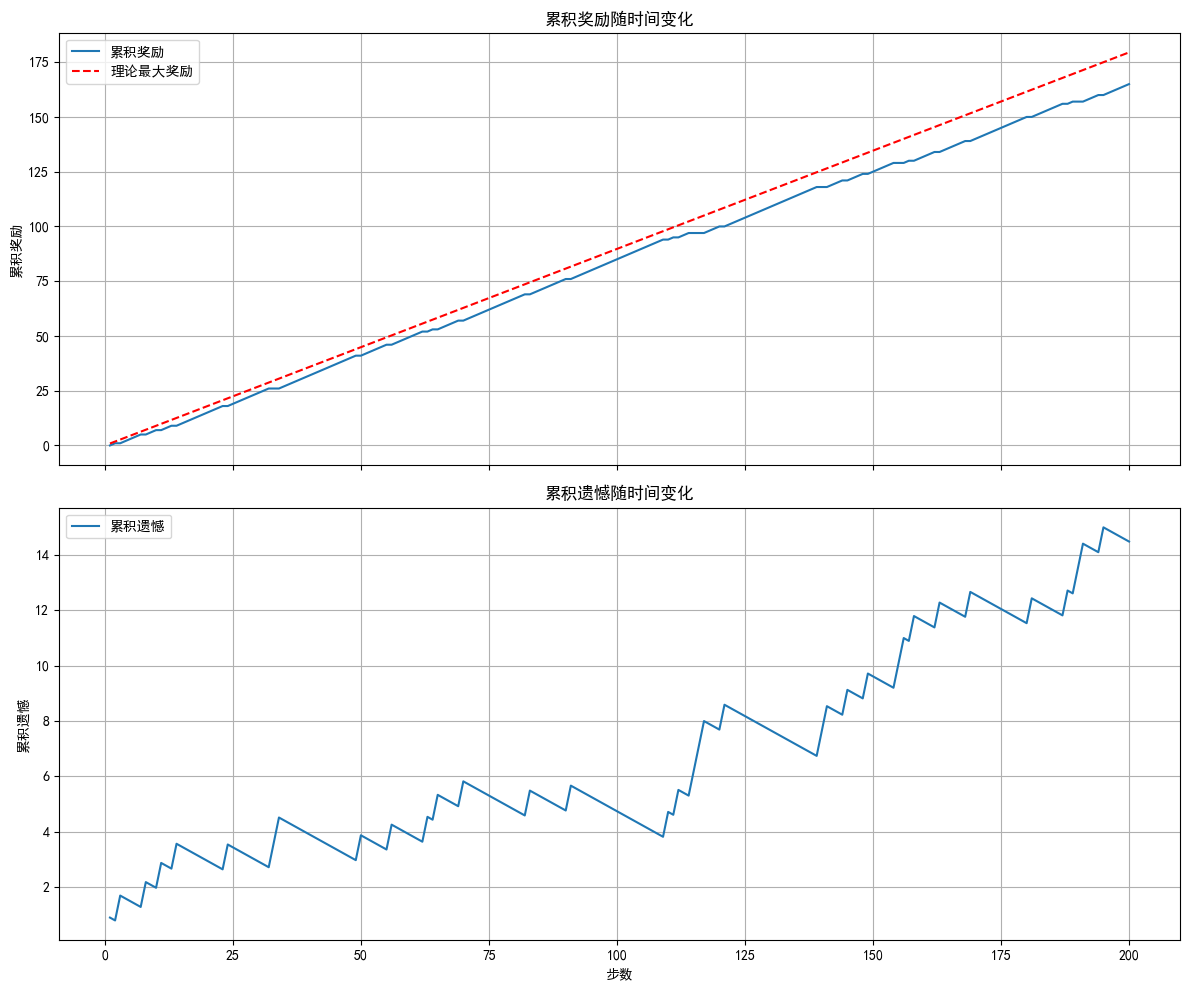

In [55]:
print(f"\n累积奖励: {bandit.cumulative_reward}")
print(f"累积遗憾: {bandit.cumulative_regret:.2f}")
print(f"每个臂的选择次数: {bandit.counts}")
print(f"每个臂的平均奖励: {np.round(bandit.values, 4)}")
bandit.plot_performance()


累积奖励: 156.0
累积遗憾: 23.48
每个臂的选择次数: [  9   9   4  12  10   4 135   3   6   8]
每个臂的平均奖励: [0.6667 0.7778 0.     0.75   0.7    0.     0.8889 0.6667 0.1667 0.5   ]


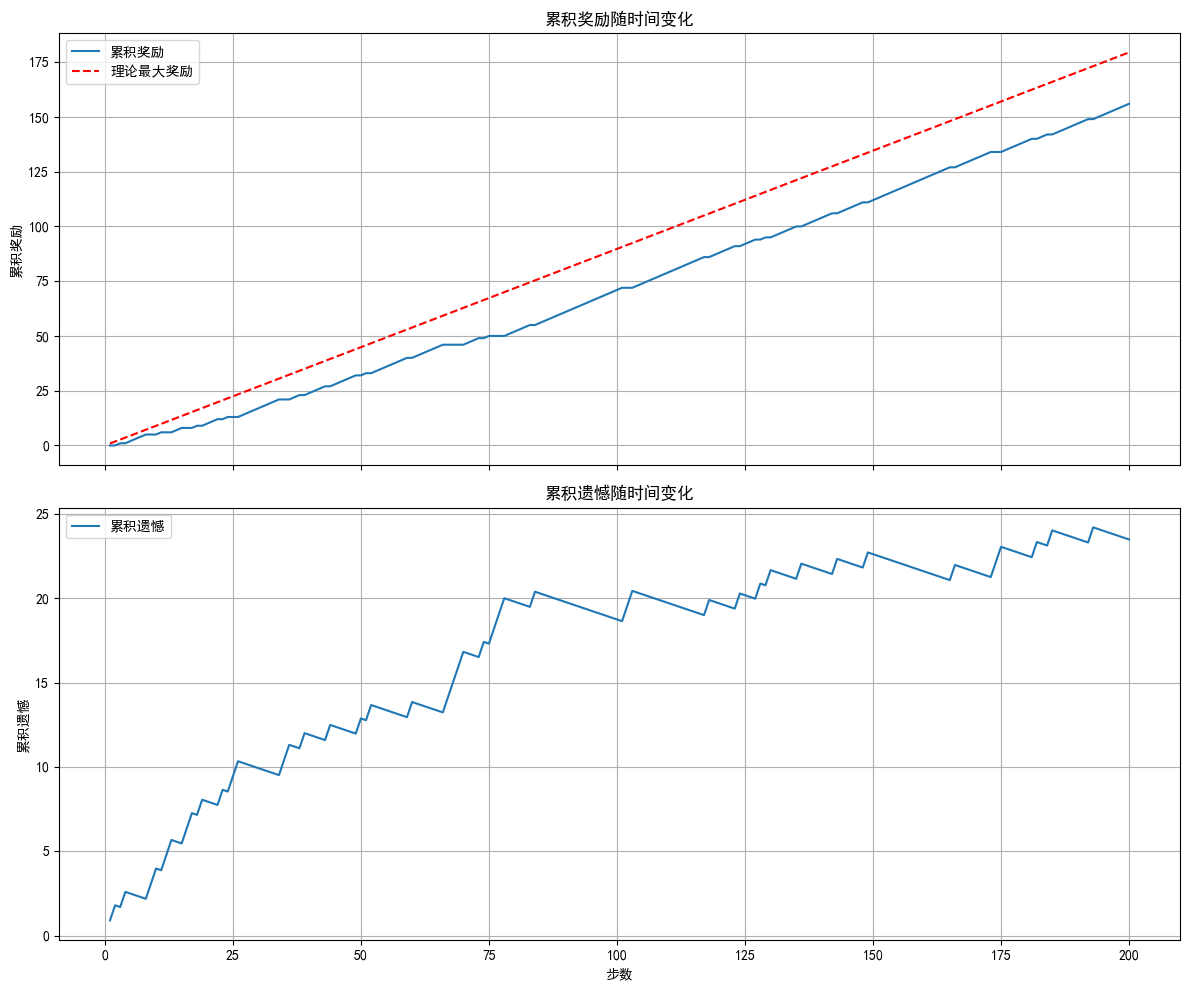

In [64]:
"""policy 2: 随时间衰减的贪婪算法"""
bandit.reset_stats()

steps = 200
epsilon = 0.5
decay = 0.99

def epsilon_greedy_decaying(bandit, epsilon=epsilon, decay=decay, steps=steps):
    K = bandit.K

    for i in range(steps):
        epsilon *= decay
        if np.random.rand() < epsilon: # 探索
            arm = np.random.randint(K)
        else:
            arm = np.argmax(bandit.values) # 利用

        bandit.step(arm)
            
epsilon_greedy_decaying(bandit)

print(f"\n累积奖励: {bandit.cumulative_reward}")
print(f"累积遗憾: {bandit.cumulative_regret:.2f}")
print(f"每个臂的选择次数: {bandit.counts}")
print(f"每个臂的平均奖励: {np.round(bandit.values, 4)}")
bandit.plot_performance()